In [1]:
from sqlalchemy import create_engine
import pandas as pd
import numpy as np

# Receita

### CNPJ

In [2]:
disk_engine = create_engine(r'sqlite:///C:\Users\Renato\OneDrive\Pessoal\RSL Consultoria\Horizon\05-Tese Psiquiatria\HZN-tese-psiquiatria\psiquiatria.db')
df_RF = pd.read_sql_query("SELECT CO_UNIDADE,CO_CNES,cnpj,NO_RAZAO_SOCIAL,cep  FROM receita",disk_engine) #42 EMPRESAS PRA FAZER SCRAPING
df_RF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21071 entries, 0 to 21070
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CO_UNIDADE       21071 non-null  object 
 1   CO_CNES          21071 non-null  int64  
 2   cnpj             21071 non-null  float64
 3   NO_RAZAO_SOCIAL  21071 non-null  object 
 4   cep              19113 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 823.2+ KB


In [3]:
df_RF.head()

,CO_UNIDADE,CO_CNES,cnpj,NO_RAZAO_SOCIAL,cep
0,"3,53431E+12",7970994,1.358472e+13,TASINAFFO ANTONIASSI LTDA,14.620-000
1,"2,92741E+12",7978359,2.308397e+13,JM PSICOLOGIA LTDA ME,None
2,"5,10791E+12",7824580,2.301707e+13,M G DE CARVALHO SANTOS EIRELI ME,None
3,"3,55031E+12",7912900,2.365926e+13,ONO REVELES MEDICINA E SAUDE,05.409-001
4,"3,15401E+12",7909454,2.397397e+13,BRAZ BIFANO BASTOS ME,None


In [4]:
df_RF['cnes_string'] = df_RF['CO_CNES'].astype(str)
rst = df_RF['cnes_string'].map(lambda calc: len(calc))
print("No. of characters in each word in the given series:")
rst.unique() #CNES FORMATO OK

No. of characters in each word in the given series:


array([7], dtype=int64)

In [5]:
#CNPJ
df_RF['cnpj_int'] = df_RF['cnpj'].apply(np.int64)
df_RF['CNPJ_string'] = df_RF['cnpj_int'].astype(str)
df_RF['CNPJ_Lenght'] = df_RF['CNPJ_string'].map(lambda calc: len(calc))
print("No. of characters in each word in the given series:")
df_RF['CNPJ_Lenght'].unique() #CNPJ FORMATO OK

No. of characters in each word in the given series:


array([14, 13, 12, 11, 10], dtype=int64)

In [6]:
df_RF.loc[df_RF['CNPJ_Lenght']==10,'CNPJ_string']='0000'+df_RF['CNPJ_string']
df_RF.loc[df_RF['CNPJ_Lenght']==11,'CNPJ_string']='000'+df_RF['CNPJ_string']
df_RF.loc[df_RF['CNPJ_Lenght']==12,'CNPJ_string']='00'+df_RF['CNPJ_string']
df_RF.loc[df_RF['CNPJ_Lenght']==13,'CNPJ_string']='0'+df_RF['CNPJ_string']

In [7]:
df_RF['CNPJ_NEW_Lenght'] = df_RF['CNPJ_string'].map(lambda calc: len(calc))
df_RF['CNPJ_NEW_Lenght'].unique()# adicionado todos zeros antes de cada cnpj para todos ficarem com 14 digitos


array([14], dtype=int64)

In [8]:
df_RF.columns

Index(['CO_UNIDADE', 'CO_CNES', 'cnpj', 'NO_RAZAO_SOCIAL', 'cep',
       'cnes_string', 'cnpj_int', 'CNPJ_string', 'CNPJ_Lenght',
       'CNPJ_NEW_Lenght'],
      dtype='object')

In [9]:
df_RF['cnpj']=df_RF['CNPJ_string'] #jogando fora cnpj antigo e usando o que geramos acima
# criando dict
dict_RF_CNPJ = df_RF.set_index('CO_CNES')['cnpj'].to_dict() # PASSAR ESSE DICT NA BASE.CSV
# dict_CNES_CNPJ 

### CEP

In [10]:
#CEP
df_RF['cep_Lenght'] = df_RF['cep'].fillna('0').map(lambda calc: len(calc))
print("No. of characters in each word in the given series:")
df_RF['cep_Lenght'].unique() #cep FORMATO OK

No. of characters in each word in the given series:


array([10,  1], dtype=int64)

In [11]:
df_RF[df_RF['cep_Lenght']==10].head(3)

,CO_UNIDADE,CO_CNES,cnpj,NO_RAZAO_SOCIAL,cep,cnes_string,cnpj_int,CNPJ_string,CNPJ_Lenght,CNPJ_NEW_Lenght,cep_Lenght
0,"3,53431E+12",7970994,13584723000127,TASINAFFO ANTONIASSI LTDA,14.620-000,7970994,13584723000127,13584723000127,14,14,10
3,"3,55031E+12",7912900,23659264000157,ONO REVELES MEDICINA E SAUDE,05.409-001,7912900,23659264000157,23659264000157,14,14,10
5,"4,20541E+12",7949278,10145868000133,BECKER E BENDER CLINICA PSIQUIATRICA SS ME,88.015-200,7949278,10145868000133,10145868000133,14,14,10


In [12]:
#tirando . e - do cep RF
df_RF['cep'] = df_RF['cep'].str.replace('.','').str.replace('-','')

<ipython-input-12-7ca8f39337c9>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_RF['cep'] = df_RF['cep'].str.replace('.','').str.replace('-','')


In [13]:
df_RF['cep_Lenght'] = df_RF['cep'].fillna('0').map(lambda calc: len(calc))
print("No. of characters in each word in the given series:")
df_RF['cep_Lenght'].unique() #cep FORMATO OK

No. of characters in each word in the given series:


array([8, 1], dtype=int64)

In [14]:
dict_RF_CEP = df_RF.set_index('CO_CNES')['cep'].to_dict() # PASSAR ESSE DICT NA BASE.CSV
# dict_RF_CEP


# CNES


### CNPJ

In [15]:
disk_engine = create_engine(r'sqlite:///C:\Users\Renato\OneDrive\Pessoal\RSL Consultoria\Horizon\05-Tese Psiquiatria\HZN-tese-psiquiatria\psiquiatria.db')
df_CNES = pd.read_sql_query("SELECT id,cnes,\"Nome Fantasia\", \"Razão Social\",CNPJ,CEP  FROM DATA",disk_engine) #42 EMPRESAS PRA FAZER SCRAPING
df_CNES.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393062 entries, 0 to 393061
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             393062 non-null  int64  
 1   cnes           393062 non-null  int64  
 2   Nome Fantasia  393043 non-null  object 
 3   Razão Social   393059 non-null  object 
 4   CNPJ           164043 non-null  float64
 5   CEP            393062 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 18.0+ MB


In [16]:
df_CNES['cnes'].nunique()

393062

In [17]:
df_CNES['cnes_string'] = df_CNES['cnes'].astype(str)
rst = df_CNES['cnes_string'].map(lambda calc: len(calc))
print("No. of characters in each word in the given series:")
rst.unique() #CNES FORMATO OK

No. of characters in each word in the given series:


array([7], dtype=int64)

In [18]:
df_CNES = df_CNES[df_CNES['CNPJ'].notnull()]

In [19]:
#CNPJ
df_CNES['CNPJ_int'] = df_CNES['CNPJ'].apply(np.int64)
df_CNES['CNPJ_string'] = df_CNES['CNPJ_int'].astype(str)
df_CNES['CNPJ_Lenght'] = df_CNES['CNPJ_string'].map(lambda calc: len(calc))
print("No. of characters in each word in the given series:")
df_CNES['CNPJ_Lenght'].unique() #CNPJ FORMATO OK

No. of characters in each word in the given series:


array([13, 14, 12, 11,  9, 10,  8,  6], dtype=int64)

In [20]:
df_CNES.loc[df_CNES['CNPJ_Lenght']==6,'CNPJ_string']='00000000'+df_CNES['CNPJ_string']
df_CNES.loc[df_CNES['CNPJ_Lenght']==8,'CNPJ_string']='000000'+df_CNES['CNPJ_string']
df_CNES.loc[df_CNES['CNPJ_Lenght']==9,'CNPJ_string']='00000'+df_CNES['CNPJ_string']
df_CNES.loc[df_CNES['CNPJ_Lenght']==10,'CNPJ_string']='0000'+df_CNES['CNPJ_string']
df_CNES.loc[df_CNES['CNPJ_Lenght']==11,'CNPJ_string']='000'+df_CNES['CNPJ_string']
df_CNES.loc[df_CNES['CNPJ_Lenght']==12,'CNPJ_string']='00'+df_CNES['CNPJ_string']
df_CNES.loc[df_CNES['CNPJ_Lenght']==13,'CNPJ_string']='0'+df_CNES['CNPJ_string']


In [21]:
df_CNES['CNPJ_NEW_Lenght'] = df_CNES['CNPJ_string'].map(lambda calc: len(calc))
df_CNES['CNPJ_NEW_Lenght'].unique()# adicionado todos zeros antes de cada cnpj para todos ficarem com 14 digitos

array([14], dtype=int64)

In [22]:
dict_CNES_CNPJ = df_CNES.set_index('cnes')['CNPJ_string'].to_dict() # PASSAR ESSE DICT NA BASE.CSV
# dict_CNES_CNPJ


### CEP

In [23]:
#CEP
# df_CNES['CEP_int'] = df_CNES['CEP'].apply(np.int64)
df_CNES['CEP_string'] = df_CNES['CEP'].astype(str)
df_CNES['CEP_Lenght'] = df_CNES['CEP_string'].map(lambda calc: len(calc))
print("No. of characters in each word in the given series:")
df_CNES['CEP_Lenght'].unique() #CEP FORMATO OK

No. of characters in each word in the given series:


array([8, 7], dtype=int64)

In [24]:
df_CNES[df_CNES['CEP_Lenght']==7].head(2)

,id,cnes,Nome Fantasia,Razão Social,CNPJ,CEP,cnes_string,CNPJ_int,CNPJ_string,CNPJ_Lenght,CNPJ_NEW_Lenght,CEP_string,CEP_Lenght
25,3550307732104,7732104,M FERRARI ODONTOLOGIA,M FERRARI ODONTOLOGIA LTDA,2.139645e+13,5042001,7732104,21396448000146,21396448000146,14,14,5042001,7
31,3550309577130,9577130,INCREASING SERVICOS MEDICOS,INCREASING SERVICOS MEDICOS LTDA,2.513797e+13,4026000,9577130,25137965000151,25137965000151,14,14,4026000,7


In [25]:
df_CNES.loc[df_CNES['CEP_Lenght']==7,'CEP_string']='0'+df_CNES['CEP_string']

In [26]:
df_CNES['CEP_NEW_Lenght'] = df_CNES['CEP_string'].map(lambda calc: len(calc))
df_CNES['CEP_NEW_Lenght'].unique()# adicionado todos zeros antes de cada CEP para todos ficarem com 8 digitos


array([8], dtype=int64)

In [27]:
dict_CNES_CEP = df_CNES.set_index('cnes')['CEP_string'].to_dict() # PASSAR ESSE DICT NA BASE.CSV
# dict_CNES_CEP

# Importando BASE.csv

In [28]:
df = pd.read_csv(r'App\base.csv', sep = ';', encoding = 'latin1')

<ipython-input-28-dd13301c0222>:1: DtypeWarning: Columns (92,93,123,153,155,156,180) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'App\base.csv', sep = ';', encoding = 'latin1')


#### Passando dicts de CNPJ

In [29]:
df[['cnes','CNPJ','cnpj']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21053 entries, 0 to 21052
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cnes    21053 non-null  int64 
 1   CNPJ    21053 non-null  object
 2   cnpj    21053 non-null  object
dtypes: int64(1), object(2)
memory usage: 493.6+ KB


In [30]:
df[['cnes','CNPJ','cnpj']].head(3)

,cnes,CNPJ,cnpj
0,7035594,"1,40884E+13","1,40884E+13"
1,9575782,"2,44686E+13","2,44686E+13"
2,9577130,"2,5138E+13","2,5138E+13"


In [31]:
df['cnpj'] = df['cnes'].map(dict_RF_CNPJ) #reescrevendo a col cnpj da receita a partir do dict
df['CNPJ'] = df['cnes'].map(dict_CNES_CNPJ) #reescrevendo a col cnpj da base do CNES a partir do dict

In [32]:
df[['cnes','CNPJ','cnpj']].head(3)

,cnes,CNPJ,cnpj
0,7035594,14088437000133,14088437000133
1,9575782,24468575000100,24468575000100
2,9577130,25137965000151,25137965000151


In [33]:
df[['cnes','CNPJ','cnpj']].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21053 entries, 0 to 21052
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cnes    21053 non-null  int64 
 1   CNPJ    21053 non-null  object
 2   cnpj    21053 non-null  object
dtypes: int64(1), object(2)
memory usage: 493.6+ KB


#### Passando dicts de cep

In [34]:
df[['cnes','CEP','cep']].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21053 entries, 0 to 21052
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cnes    21053 non-null  int64 
 1   CEP     21053 non-null  int64 
 2   cep     19095 non-null  object
dtypes: int64(2), object(1)
memory usage: 493.6+ KB


In [35]:
df[['cnes','CEP','cep']].head(3)


,cnes,CEP,cep
0,7035594,72215170,72.215-170
1,9575782,78563000,78.563-000
2,9577130,4026000,04.026-000


In [36]:
#passar os dicts acima
df['cep'] = df['cnes'].map(dict_RF_CEP) #reescrevendo a col cep da receita a partir do dict
df['CEP'] = df['cnes'].map(dict_CNES_CEP) #reescrevendo a col cep da base do CEP a partir do dict

In [37]:
df[['cnes','CEP','cep']].head(3)


,cnes,CEP,cep
0,7035594,72215170,72215170
1,9575782,78563000,78563000
2,9577130,04026000,04026000


# CNPJ com 8 digitos

In [38]:
df['CNPJ_8_Digitos'] = df['CNPJ'].str[:8]

In [39]:
df_cnpj = df.groupby(['CNPJ_8_Digitos'])['CNPJ'].count().reset_index().sort_values(by='CNPJ',ascending=False)
# df_cnpj['CNPJ'][df_cnpj['CNPJ']>1].sum()
df_cnpj = df_cnpj[df_cnpj['CNPJ']>1]
df_cnpj['valor']=1

In [40]:
dict_cnpj_8dig = df_cnpj.set_index('CNPJ_8_Digitos')['valor'].to_dict()
# dict_cnpj_8dig

In [41]:
#passando dict acima no df
df['Pertence Grupo'] = df['CNPJ_8_Digitos'].map(dict_cnpj_8dig)


In [42]:
df[df['Pertence Grupo'].notnull()].shape[0]

2231

In [43]:
print('Total de CNPJ\'s:',df['CNPJ'].nunique())
print('Total de CNPJ\'s 8 digitos:',df['CNPJ_8_Digitos'].nunique())
print('Diferença:',df['CNPJ'].nunique()-df['CNPJ_8_Digitos'].nunique(), 'que estão divididos em 740 grupos')

Total de CNPJ's: 21053
Total de CNPJ's 8 digitos: 19562
Diferença: 1491 que estão divididos em 740 grupos


array([<AxesSubplot:ylabel='Frequency'>], dtype=object)

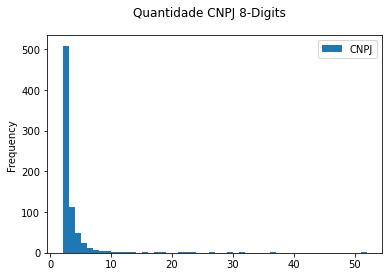

In [44]:
df_groups = df.groupby(['CNPJ_8_Digitos'])['CNPJ'].count().reset_index().sort_values(by='CNPJ',ascending=False)#[df['CNPJ']!=1]
# print('Distribuição de grupos (Quantidade de CNPJ_8_Digitos iguais)')
# df_groups[df_groups['CNPJ']>1].hist(bins=50)
df_groups[df_groups['CNPJ']>1].plot(kind='hist',bins=50,subplots=True,sharex=True,sharey=True,title='Quantidade CNPJ 8-Digits')

In [45]:
print('Quantidade de CNPJ 8-Digits')
df_groups[df_groups['CNPJ']>1]['CNPJ'].describe()

Quantidade de CNPJ 8-Digits


count    740.000000
mean       3.014865
std        3.436026
min        2.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       52.000000
Name: CNPJ, dtype: float64

# Recruzando Base da Transunion

In [46]:
df_trans = pd.read_excel('Base Faturamento_v2.xlsx',dtype={'CNPJ':object})


In [47]:
df_trans['CNPJ']

0      97260095000114
1      97134480000204
2      96778279000108
3      95880407000167
4      94576691000110
            ...      
409               NaN
410               NaN
411               NaN
412               NaN
413               NaN
Name: CNPJ, Length: 414, dtype: object

In [48]:
#CNPJ
# df_trans['CNPJ_int'] = df_trans['CNPJ'].apply(np.int64)
df_trans['CNPJ_string'] = df_trans['CNPJ'].astype(str)
df_trans['CNPJ_Lenght'] = df_trans['CNPJ_string'].map(lambda calc: len(calc))
print("No. of characters in each word in the given series:")
df_trans['CNPJ_Lenght'].unique() 

No. of characters in each word in the given series:


array([14, 13, 12,  3], dtype=int64)

In [49]:
df_trans.loc[df_trans['CNPJ_Lenght']==12,'CNPJ_string']='00'+df_trans['CNPJ_string']
df_trans.loc[df_trans['CNPJ_Lenght']==13,'CNPJ_string']='0'+df_trans['CNPJ_string']

In [50]:
df_trans[df_trans['CNPJ_Lenght']==12]

,Nome Fantasia,Raz�o Social,CNPJ,CNPJ.1,check,DS_FAIXA_FATURAMENTO,Vinci,Quality check,97?,CNPJ_string,CNPJ_Lenght
402,CONVERGENCIA CONSULTORIA DE RECURSOS HUMANOS LTDA,CONVERGENCIA CONSULTORIA DE RECURSOS HUMANOS LTDA,965902000162,965902000162,0,De R$1.800.001 a R$3.600.000,NaN,NaN,,00965902000162,12
403,INSTITUTO CYRO MARTINS,CENTRO CLINICO PETROPOLIS SOCIEDADE SIMPLES LTDA,949027000125,949027000125,0,De R$3.600.001 a R$5.000.000,NaN,NaN,,00949027000125,12
404,INC PATIO BATEL,INSTITUTO DE NEUROLOGIA DE CURITIBA LTDA,942063000329,942063000329,0,De R$25.000.001 a R$50.000.000,NaN,NaN,,00942063000329,12
405,VILA SERENA,INST MEJ DE CONSULTORIA E TRATAMENTO DEPENDENC...,584566000108,584566000108,0,De R$10.000.001 a R$25.000.000,NaN,NaN,0.25,00584566000108,12
406,CLINICA BOM VIVER,NUCLEO DE SAUDE E ASSISTENCIA HOSPITALAR LTDA,536674000105,536674000105,0,De R$10.000.001 a R$25.000.000,15.0,na faixa,1,00536674000105,12
407,HOSPITAL SANCTA MAGGIORE,PREVENT SENIOR PRIVATE OPERADORA DE SAUDE LTDA,461479004150,461479004150,0,Acima de R$100.000.000,NaN,NaN,,00461479004150,12


In [51]:
dict_cnpj_Razão_trans = df_trans[df_trans['CNPJ_string']!='nan'].set_index('CNPJ_string')['Raz�o Social'].to_dict()
# dict_cnpj_Faturamento_trans = df_trans[df_trans['CNPJ_string']!='nan'].set_index('CNPJ_string')['DS_FAIXA_FATURAMENTO'].to_dict()

In [52]:
df['Razao_Social_transunion'] = df['CNPJ'].map(dict_cnpj_Razão_trans)

In [53]:
df['Razao_Social_transunion'][df['Razao_Social_transunion'].notnull()].shape[0]

400

In [54]:
#repassando o faturamento pra confirmar se estava certo
# df[['faturamento_presumido','CNPJ']][df['faturamento_presumido'].notnull()]
# df['faturamento_presumido2'] = df['CNPJ'].map(dict_cnpj_Faturamento_trans)
# df[['faturamento_presumido','faturamento_presumido2','CNPJ']][df['faturamento_presumido'].notnull()]


In [55]:
# df['comp_fatur'] = df['faturamento_presumido']==df['faturamento_presumido2']
# df[['faturamento_presumido','faturamento_presumido2','CNPJ']][(df['comp_fatur']==False)&(df['faturamento_presumido2'].notnull())]

# Extraindo a base

In [56]:
df.to_csv(r'App\base2.csv',index=False)

Testando impor da base no streamlit

In [57]:
# df_stream = pd.read_csv(r'App\base2.csv',dtype={'cnpj': object,'CNPJ': object,'cep': object,'CEP': object,'CNPJ_8_Digitos':object})

In [58]:
# df_stream[['cnpj','CNPJ']]#.info()